# Storytelling with Data (Colab): Superstore Interactive Dashboard

**Concept:** Perception-Based Design + Data Storytelling  
**Dataset:** Sample Superstore (retail orders)  
**Output:** Static + interactive plots, and a mini “dashboard” with dropdown views (no ipywidgets needed).


In [4]:
!pip -q install plotly
print("Installed plotly.")


Installed plotly.


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "colab"  # safest for Google Colab
pd.set_option("display.max_columns", 200)

print("Imports ready.")


Imports ready.


In [7]:
df = px.data.gapminder()   # built-in with plotly
df.head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [8]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.describe(include="all").T


Shape: (1704, 8)
Columns: ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num']


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,1704,142,Afghanistan,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,1704,5,Africa,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1704.0,NaN,NaN,NaN,1979.5,17.26533,1952.0,1965.75,1979.5,1993.25,2007.0
lifeExp,1704.0,NaN,NaN,NaN,59.474439,12.917107,23.599,48.198,60.7125,70.8455,82.603
pop,1704.0,NaN,NaN,NaN,29601212.324531,106157896.743915,60011.0,2793664.0,7023595.5,19585221.75,1318683096.0
gdpPercap,1704.0,NaN,NaN,NaN,7215.327081,9857.454543,241.165876,1202.060309,3531.846989,9325.462346,113523.1329
iso_alpha,1704,141,KOR,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iso_num,1704.0,NaN,NaN,NaN,425.880282,248.305709,4.0,208.0,410.0,638.0,894.0


In [9]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.describe(include="all").T


Shape: (1704, 8)
Columns: ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num']


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,1704,142,Afghanistan,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,1704,5,Africa,624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1704.0,NaN,NaN,NaN,1979.5,17.26533,1952.0,1965.75,1979.5,1993.25,2007.0
lifeExp,1704.0,NaN,NaN,NaN,59.474439,12.917107,23.599,48.198,60.7125,70.8455,82.603
pop,1704.0,NaN,NaN,NaN,29601212.324531,106157896.743915,60011.0,2793664.0,7023595.5,19585221.75,1318683096.0
gdpPercap,1704.0,NaN,NaN,NaN,7215.327081,9857.454543,241.165876,1202.060309,3531.846989,9325.462346,113523.1329
iso_alpha,1704,141,KOR,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iso_num,1704.0,NaN,NaN,NaN,425.880282,248.305709,4.0,208.0,410.0,638.0,894.0


In [10]:
df.isna().sum()


,0
country,0
continent,0
year,0
lifeExp,0
pop,0
gdpPercap,0
iso_alpha,0
iso_num,0


## Act 1 — Setup (Context + Hook)

**Question:** As countries get richer, do people live longer — and is progress evenly shared across regions?

We will:
- Compare **life expectancy vs GDP per capita** over time
- Look at **continent differences**
- Build an interactive dashboard to explore changes across years


In [12]:
latest_year = df["year"].max()
latest = df[df["year"] == latest_year]

kpis = {
    "Latest Year": latest_year,
    "Countries": latest["country"].nunique(),
    "World Avg LifeExp": latest["lifeExp"].mean(),
    "World Median GDP/Cap": latest["gdpPercap"].median(),
    "World Population (B)": latest["pop"].sum()/1e9
}
pd.DataFrame(kpis, index=["Value"]).T


,Value
Latest Year,2007.000000
Countries,142.000000
World Avg LifeExp,67.007423
World Median GDP/Cap,6124.371109
World Population (B),6.251013


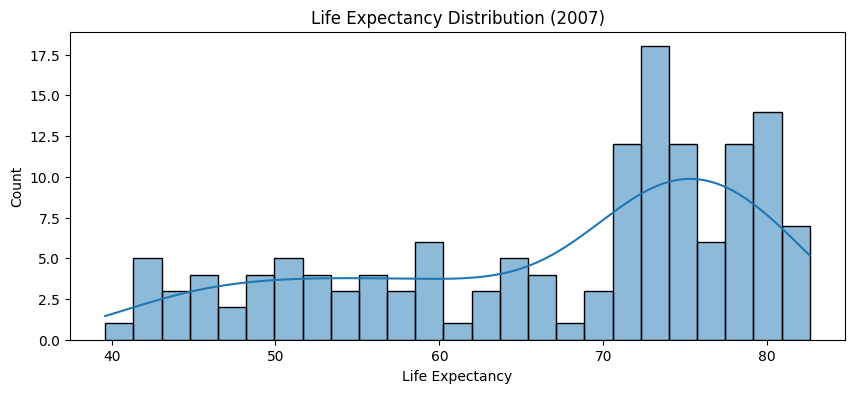

In [13]:
plt.figure(figsize=(10,4))
sns.histplot(latest["lifeExp"], bins=25, kde=True)
plt.title(f"Life Expectancy Distribution ({latest_year})")
plt.xlabel("Life Expectancy")
plt.show()


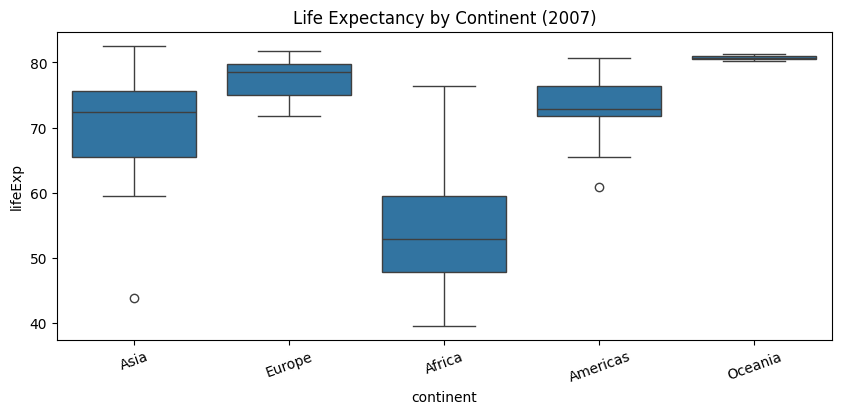

In [14]:
plt.figure(figsize=(10,4))
sns.boxplot(data=latest, x="continent", y="lifeExp")
plt.title(f"Life Expectancy by Continent ({latest_year})")
plt.xticks(rotation=20)
plt.show()


In [15]:
fig = px.scatter(
    df,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=55,
    title="Life Expectancy vs GDP per Capita (Bubble = Population)"
)
fig.update_layout(height=550)
fig.show()


## Act 2 — Conflict (Insights)

Now we look for the “uneven progress”:
- Which continents improved fastest?
- Where do we still see low life expectancy even as GDP rises?
- How does population scale change interpretation?


In [16]:
cont_trend = df.groupby(["year","continent"], as_index=False).agg(
    lifeExp=("lifeExp","mean"),
    gdpPercap=("gdpPercap","median"),
    pop=("pop","sum")
)

fig = px.line(cont_trend, x="year", y="lifeExp", color="continent",
              title="Average Life Expectancy Over Time by Continent")
fig.show()


In [17]:
fig = px.line(cont_trend, x="year", y="gdpPercap", color="continent",
              title="Median GDP per Capita Over Time by Continent", log_y=True)
fig.show()


In [18]:
corr_by_year = df.groupby("year").apply(
    lambda d: d[["log_gdpPercap","lifeExp"]].corr().iloc[0,1]
).reset_index(name="corr(log_gdpPercap, lifeExp)")

corr_by_year.head()


,year,"corr(log_gdpPercap, lifeExp)"
0,1952,0.747781
1,1957,0.758796
2,1962,0.770523
3,1967,0.772999
4,1972,0.789406


In [19]:
fig = px.line(corr_by_year, x="year", y="corr(log_gdpPercap, lifeExp)",
              title="Correlation Between Wealth and Life Expectancy Over Time")
fig.show()


In [20]:
# Prepare views: one continent at a time + "All"
continents = ["All"] + sorted(df["continent"].unique().tolist())

traces = []
for cont in continents:
    d = df if cont == "All" else df[df["continent"] == cont]
    d_latest = d[d["year"] == latest_year]
    traces.append(
        go.Scatter(
            x=d_latest["gdpPercap"],
            y=d_latest["lifeExp"],
            mode="markers",
            marker=dict(size=np.clip(d_latest["pop"]/1e7, 4, 35), opacity=0.65),
            text=d_latest["country"],
            name=cont,
            visible=(cont=="All")
        )
    )

fig = go.Figure(data=traces)

buttons = []
for i, cont in enumerate(continents):
    visible = [False]*len(continents)
    visible[i] = True
    buttons.append(dict(
        label=cont,
        method="update",
        args=[
            {"visible": visible},
            {"title": f"{latest_year}: LifeExp vs GDP/Cap ({cont})",
             "xaxis": {"title":"GDP per Capita (log scale)", "type":"log"},
             "yaxis": {"title":"Life Expectancy"}}
        ]
    ))

fig.update_layout(
    title=f"{latest_year}: LifeExp vs GDP/Cap (All)",
    updatemenus=[dict(buttons=buttons, direction="down", x=0.02, y=1.18)],
    height=550
)
fig.show()


## Act 3 — Resolution (Action + Impact)

**What this dashboard enables**
- Policy teams can compare continents/countries and identify lagging regions.
- NGOs can prioritize health interventions where GDP rises but life expectancy remains low.
- Analysts can track whether “wealth → longevity” strength is changing over time.

**Design choices (perception-based)**
- Position encodes relationship (GDP vs lifeExp)
- Size encodes population (adds context without clutter)
- Color encodes continent (categorical distinction)
- Log scale avoids compressing lower-income countries into a corner


## Try (Exercise)
1) Pick one continent from the dropdown (Cell 18).  
2) Identify **one outlier country**: either high GDP but relatively low life expectancy, or low GDP but surprisingly high life expectancy.  
3) Write a 3-line story:
- What you expected
- What you saw
- What you recommend investigating next


### Sample Answer Structure
- **Expectation:** As GDP per capita rises, life expectancy increases.
- **Observation:** Country X deviates (describe how).
- **Next step:** Investigate healthcare access, conflict, disease burden, inequality, or reporting.


In [21]:
df_out = df[["country","continent","year","lifeExp","gdpPercap","pop","gdp_total","log_gdpPercap","pop_millions"]].copy()
df_out.to_csv("gapminder_storytelling_clean.csv", index=False)
print("Saved: gapminder_storytelling_clean.csv")


Saved: gapminder_storytelling_clean.csv


# Extension: Going Deeper (Beyond the Basic Story)

Now that we see the global pattern, we’ll answer deeper questions:

1. **Inequality:** Are some continents improving faster than others?
2. **Outliers:** Which countries “beat” or “underperform” expectations?
3. **Growth:** Who improved the most over time?
4. **Tradeoffs:** Does population size change how we interpret progress?

We’ll also add **more perception-driven design choices**: sorting, annotations, and small multiples.


In [22]:
coverage = df.groupby("year", as_index=False).agg(
    countries=("country","nunique"),
    total_pop=("pop","sum")
)
coverage["total_pop_B"] = coverage["total_pop"] / 1e9
coverage


,year,countries,total_pop,total_pop_B
0,1952,142,2406957150,2.406957
1,1957,142,2664404580,2.664405
2,1962,142,2899782974,2.899783
3,1967,142,3217478384,3.217478
4,1972,142,3576977158,3.576977
5,1977,142,3930045807,3.930046
6,1982,142,4289436840,4.289437
7,1987,142,4691477418,4.691477
8,1992,142,5110710260,5.110710
9,1997,142,5515204472,5.515204


In [23]:
fig = px.line(coverage, x="year", y="countries", title="Number of Countries Tracked Over Time")
fig.show()

fig = px.line(coverage, x="year", y="total_pop_B", title="Total Population Covered (Billions)")
fig.show()


In [24]:
fig = px.line(coverage, x="year", y="countries", title="Number of Countries Tracked Over Time")
fig.show()

fig = px.line(coverage, x="year", y="total_pop_B", title="Total Population Covered (Billions)")
fig.show()


## Why do we use a log scale for GDP per capita?

GDP per capita spans **orders of magnitude**.  
Without a log scale, low-income countries get squeezed into a tiny corner, hiding structure.

**Teaching idea:**  
- Use linear scale to show distortion  
- Use log scale to restore interpretability


In [25]:
d_latest = df[df["year"] == latest_year].copy()

fig1 = px.scatter(d_latest, x="gdpPercap", y="lifeExp", color="continent",
                  size="pop", hover_name="country",
                  title=f"{latest_year}: Linear GDP scale (distorts low-income structure)")
fig1.update_layout(height=520)
fig1.show()

fig2 = px.scatter(d_latest, x="gdpPercap", y="lifeExp", color="continent",
                  size="pop", hover_name="country", log_x=True,
                  title=f"{latest_year}: Log GDP scale (reveals structure)")
fig2.update_layout(height=520)
fig2.show()


In [26]:
spread = df.groupby(["year","continent"], as_index=False).agg(
    lifeExp_mean=("lifeExp","mean"),
    lifeExp_p10=("lifeExp", lambda x: np.percentile(x, 10)),
    lifeExp_p90=("lifeExp", lambda x: np.percentile(x, 90))
)
spread["gap_p90_p10"] = spread["lifeExp_p90"] - spread["lifeExp_p10"]
spread.head()


,year,continent,lifeExp_mean,lifeExp_p10,lifeExp_p90,gap_p90_p10
0,1952,Africa,39.135500,32.5478,44.9681,12.4203
1,1952,Americas,53.279840,41.9564,65.3546,23.3982
2,1952,Asia,46.314394,36.5298,60.0168,23.4870
3,1952,Europe,64.408500,57.7194,71.8870,14.1676
4,1952,Oceania,69.255000,69.1470,69.3630,0.2160


In [27]:
fig = px.line(spread, x="year", y="gap_p90_p10", color="continent",
              title="Within-Continent Inequality: Life Expectancy Gap (P90 - P10)")
fig.show()


## Outliers: Countries that beat or underperform expectations

We’ll estimate an “expected life expectancy” from GDP per capita using a simple linear model:
- **x:** log10(GDP per capita)  
- **y:** life expectancy  

Then compute residuals:
- **Positive residual:** country lives longer than expected for its GDP
- **Negative residual:** country lives shorter than expected for its GDP

This is a **teaching-friendly** approach: simple, explainable, and useful for identifying cases to investigate.


In [28]:
d = df[df["year"] == latest_year].dropna(subset=["log_gdpPercap","lifeExp"]).copy()

x = d["log_gdpPercap"].to_numpy()
y = d["lifeExp"].to_numpy()
coef = np.polyfit(x, y, 1)  # y = a*x + b
a, b = coef

d["lifeExp_expected"] = a*d["log_gdpPercap"] + b
d["residual"] = d["lifeExp"] - d["lifeExp_expected"]

print("Model: lifeExp ≈ {:.2f}*log10(gdpPercap) + {:.2f}".format(a, b))
d.sort_values("residual", ascending=False).head(10)


Model: lifeExp ≈ 16.59*log10(gdpPercap) + 4.95


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp_total,log_gdpPercap,pop_millions,lifeExp_expected,residual
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704,2.081746e+11,3.387670,85.262356,61.134339,13.114661
1115,Nicaragua,Americas,2007,72.899,5675356,2749.320965,NIC,558,1.560338e+10,3.439225,5.675356,61.989384,10.909616
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275,1.215686e+10,3.480776,4.018332,62.678496,10.743504
323,Comoros,Africa,2007,65.152,710960,986.147879,COM,174,7.011117e+08,2.993942,0.710960,54.604331,10.547669
839,"Korea, Dem. Rep.",Asia,2007,67.297,23301725,1593.065480,KOR,410,3.712117e+10,3.202234,23.301725,58.058860,9.238140
1499,Syria,Asia,2007,74.143,19314747,4184.548089,SYR,760,8.082349e+10,3.621649,19.314747,65.014883,9.128117
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,2.137641e+10,3.773569,3.600523,67.534497,8.888503
1223,Philippines,Asia,2007,71.688,91077287,3190.481016,PHL,608,2.905804e+11,3.503856,91.077287,63.061289,8.626711
1079,Nepal,Asia,2007,63.785,28901790,1091.359778,NPL,524,3.154225e+10,3.037968,28.901790,55.334503,8.450497
395,Cuba,Americas,2007,78.273,11416987,8948.102923,CUB,192,1.021604e+11,3.951731,11.416987,70.489321,7.783679


In [29]:
best = d.sort_values("residual", ascending=False).head(12)
worst = d.sort_values("residual", ascending=True).head(12)

fig = px.bar(best.sort_values("residual"),
             x="residual", y="country", orientation="h",
             title=f"{latest_year}: Countries Living Longer Than Expected (Top Residuals)")
fig.show()

fig = px.bar(worst.sort_values("residual"),
             x="residual", y="country", orientation="h",
             title=f"{latest_year}: Countries Living Shorter Than Expected (Bottom Residuals)")
fig.show()


In [30]:
fig = px.scatter(d, x="gdpPercap", y="lifeExp", color="continent",
                 hover_name="country", size="pop", log_x=True,
                 title=f"{latest_year}: LifeExp vs GDP with Expected Trend Line")

# expected line in original x-scale
xx = np.linspace(d["log_gdpPercap"].min(), d["log_gdpPercap"].max(), 60)
yy = a*xx + b
x_gdp = 10**xx

fig.add_trace(go.Scatter(x=x_gdp, y=yy, mode="lines", name="Expected trend"))
fig.update_layout(height=560)
fig.show()


## Growth Over Time: Who improved the most?

Now we measure improvement from the **earliest year** to the **latest year**:
- Δ Life Expectancy
- Δ GDP per capita (log-friendly)

This turns the story from “snapshot” → “change narrative”.


In [31]:
first_year = df["year"].min()
last_year = df["year"].max()

first = df[df["year"] == first_year][["country","continent","lifeExp","gdpPercap"]].rename(
    columns={"lifeExp":"lifeExp_first","gdpPercap":"gdp_first"}
)
last = df[df["year"] == last_year][["country","continent","lifeExp","gdpPercap","pop"]].rename(
    columns={"lifeExp":"lifeExp_last","gdpPercap":"gdp_last","pop":"pop_last"}
)

chg = first.merge(last, on=["country","continent"], how="inner")
chg["lifeExp_gain"] = chg["lifeExp_last"] - chg["lifeExp_first"]
chg["gdp_gain_log10"] = np.log10(chg["gdp_last"]) - np.log10(chg["gdp_first"])

chg.sort_values("lifeExp_gain", ascending=False).head(10)


,country,continent,lifeExp_first,gdp_first,lifeExp_last,gdp_last,pop_last,lifeExp_gain,gdp_gain_log10
96,Oman,Asia,37.578,1828.230307,75.640,22316.192870,3204897,38.062,1.086589
137,Vietnam,Asia,40.412,605.066492,74.249,2441.576404,85262356,33.837,0.605867
59,Indonesia,Asia,37.468,749.681655,70.650,3540.651564,223547000,33.182,0.674206
109,Saudi Arabia,Asia,39.875,6459.554823,72.777,21654.831940,27601038,32.902,0.525352
75,Libya,Africa,42.723,2387.548060,73.952,12057.499280,6036914,31.229,0.703305
70,"Korea, Rep.",Asia,47.453,1030.592226,78.623,23348.139730,49044790,31.170,1.355165
92,Nicaragua,Americas,42.314,3112.363948,72.899,2749.320965,5675356,30.585,-0.053865
138,West Bank and Gaza,Asia,43.160,1515.592329,73.422,3025.349798,4018332,30.262,0.300193
139,"Yemen, Rep.",Asia,32.548,781.717576,62.698,2280.769906,22211743,30.150,0.465032
46,Gambia,Africa,30.000,485.230659,59.448,752.749726,1688359,29.448,0.190702


In [32]:
top_gain = chg.sort_values("lifeExp_gain", ascending=False).head(15)

fig = px.bar(top_gain.sort_values("lifeExp_gain"),
             x="lifeExp_gain", y="country", orientation="h",
             color="continent",
             title=f"Top 15 Countries by Life Expectancy Gain ({first_year} → {last_year})")
fig.show()


In [33]:
fig = px.scatter(
    chg,
    x="gdp_gain_log10", y="lifeExp_gain",
    color="continent",
    size="pop_last",
    hover_name="country",
    title=f"Gains Relationship: GDP Growth vs Life Expectancy Gain ({first_year} → {last_year})"
)
fig.update_layout(height=560)
fig.show()


## Try (Mini-Exercise)

Pick **one** country from the “Top 15 Life Expectancy Gain” chart.

Answer:
1) Did it also have high GDP growth?  
2) If not, what non-income factors might explain the improvement? (vaccination, sanitation, reduced conflict, etc.)  
3) What additional dataset would you add to validate your explanation?


In [34]:
country_example = "India"  # change this to any country name that exists in df

c = df[df["country"] == country_example].copy()
fig = px.line(c, x="year", y="lifeExp", title=f"Life Expectancy Over Time: {country_example}")
fig.show()

fig = px.line(c, x="year", y="gdpPercap", title=f"GDP per Capita Over Time: {country_example}", log_y=True)
fig.show()


# Teaching Wrap-Up

### What you practiced
- Choosing charts based on relationship types (trend, distribution, correlation)
- Using **log scales** for wide-range variables
- Identifying **inequality** using percentiles (P90–P10)
- Detecting **outliers** using simple residual analysis
- Turning “charts” into a **story**: Setup → Conflict → Resolution

## Quick Quiz (2 minutes)
1) Why is log scaling appropriate for GDP per capita?  
2) What does a positive residual mean in our outlier model?  
3) Why can population bubble size change interpretation?
